## Extremely simple vaccination plotting via gametheory principles

Around March 2025 I found quite a few Instagram videos and complot theories floating around by coincidence. As any normal person in the middle of Labs and 5 exams, I decided to do a full literature review around Vaccination modelling and tried to find out if based on the vaccination rate, it is beneficial or not to vaccinate as an individual making the choice.

I found out, from a gametheory perspective and with quite a bad simulation, that it is often NOT beneficial to vaccinate. This did not make any sense to me, but it was a learning lesson that vaccination modelling is a tedious and very difficult task. Because Vaccines work.

In any case, this 'Simulation' Tries to compile most accurate real world data and numbers from real publications, and for different ages and scenarios tries to figure out if vaccinating is the best thing to do or not. Mostly a personal learning project for simulating a many variable system.

I tried to be somewhat SEIR accurate, and later models show that for a lifetime benefit, at early ages vaccination is ALWAYS already beneficial, and the benefits stay for longer. Just that, in the short term, you take an additional risk, so your annual risk profile DOES increase, for benefits through your whole life.

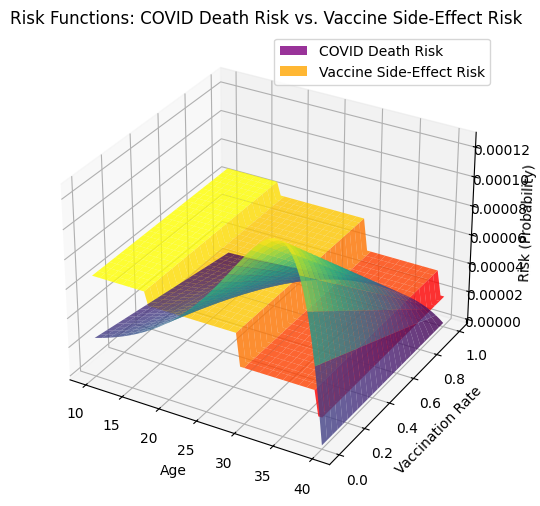

KeyboardInterrupt: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def ifr_by_age(age):
    """
    Infection fatality rate calculated by age using a polynomial fit from real data
    """
    log_ifr = (-1.11883598e-05 * age**3 +
               1.84341414e-03 * age**2 +
               3.22796514e-02 * age -
               1.10969520e+01)
    return np.exp(log_ifr)

def lifetime_infection_prob(vacc_rate, years_left, R=0.114, E=0.924):
    """
    Calculates the lifetime probability of infection over a period of 'years_left' years,
    given a vaccination rate (vacc_rate), where:

    The formula used:
      P_infection = vacc_rate * [1 - (1 - R*(1 - E))^years_left]
                    + (1 - vacc_rate) * [1 - (1 - R)^years_left]
    """
    p_vax = 1 - (1 - R * (1 - E))**years_left
    p_unvax = 1 - (1 - R)**years_left
    return vacc_rate * p_vax + (1 - vacc_rate) * p_unvax

def vaccine_side_effect_risk(age):
    """
    Returns the risk (in decimal form) of severe side effects from vaccination based on age.
    """
    if age <= 17:
        return 0.000067
    elif age <= 29:
        return 0.000058
    elif age <= 39:
        return 0.000036
    elif age <= 49:
        return 0.000019
    elif age <= 59:
        return 0.000018
    elif age <= 69:
        return 0.000016
    else:
        return 0.000015

def covid_death_risk(age, vacc_rate, max_age=40):
    """
    Computes the risk of death from COVID-19 for a person of a given 'age' and community
    vaccination rate 'vacc_rate'. The remaining years to live are assumed to be (max_age - age).
    risk_IFR = [Probability of being infected over remaining lifetime] * IFR(age)
    """
    years_left = max_age - age
    p_infection = lifetime_infection_prob(vacc_rate, years_left)
    return p_infection * ifr_by_age(age)

ages = np.linspace(10, 40, 61)
vacc_rates = np.linspace(0, 1, 51)

A, V = np.meshgrid(ages, vacc_rates)

risk_ifr = np.array([covid_death_risk(age, v) for v, age in zip(np.ravel(V), np.ravel(A))])
risk_ifr = risk_ifr.reshape(V.shape)

risk_side_effect = np.vectorize(vaccine_side_effect_risk)(A)
risk_diff = risk_ifr - risk_side_effect


# Plotting
# Plot 1: Both Risk Functions
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(A, V, risk_ifr, cmap='viridis', alpha=0.8, label="COVID Death Risk")
surf2 = ax1.plot_surface(A, V, risk_side_effect, cmap='autumn', alpha=0.8, label="Vaccine Side-Effect Risk")

ax1.set_xlabel("Age")
ax1.set_ylabel("Vaccination Rate")
ax1.set_zlabel("Risk (Probability)")
ax1.set_title("Risk Functions: COVID Death Risk vs. Vaccine Side-Effect Risk")
proxy1 = plt.Rectangle((0,0),1,1,fc="purple", alpha=0.8)
proxy2 = plt.Rectangle((0,0),1,1,fc="orange", alpha=0.8)
ax1.legend([proxy1, proxy2], ["COVID Death Risk", "Vaccine Side-Effect Risk"])

# Plot 2: risk_IFR - risk_side_effects
fig2 = plt.figure(figsize=(12, 6))
ax2 = fig2.add_subplot(111, projection='3d')
surf_diff = ax2.plot_surface(A, V, risk_diff, cmap='coolwarm', edgecolor='none')
ax2.set_xlabel("Age")
ax2.set_ylabel("Vaccination Rate")
ax2.set_zlabel("Risk Difference")
ax2.set_title("Risk Difference (COVID Death Risk - Vaccine Side-Effect Risk)")
fig2.colorbar(surf_diff, ax=ax2, shrink=0.5, aspect=5, label="Risk Difference")
x_line = np.linspace(10, 90, 81)
y_line = np.linspace(0, 1, 51)
X_line, Y_line = np.meshgrid(x_line, y_line)
Z_zero = np.zeros_like(X_line)
ax2.plot_surface(X_line, Y_line, Z_zero, color='gray', alpha=0.3)

# Annotate regions: Above 0 (Vaccinate) and below 0 (Do Not Vaccinate)
ax2.text(20, 0.9, np.max(risk_diff)*1.1, "Vaccinate", color="green", fontsize=12)
ax2.text(70, 0.1, np.min(risk_diff)*1.1, "Do Not Vaccinate", color="red", fontsize=12)

plt.show()


Fitted polynomial coefficients (degree 3) for side-effect rate:
           3             2
1.608e-10 x - 9.495e-09 x - 1.085e-06 x + 7.929e-05


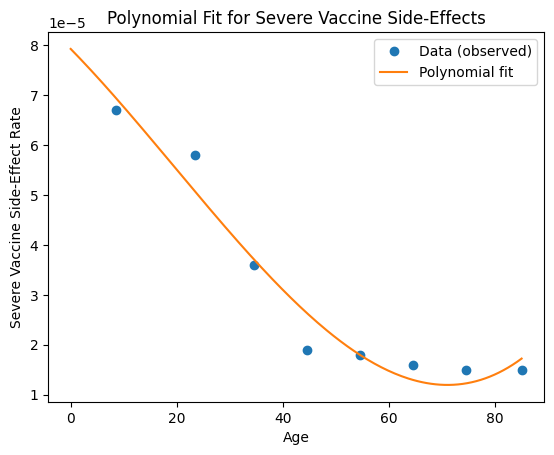

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

ages_side = np.array([  8.5,  23.5,  34.5,  44.5,  54.5,  64.5,  74.5,  85.0 ])
rate_side = np.array([6.7e-5,5.8e-5,3.6e-5,1.9e-5,1.8e-5,1.6e-5,1.5e-5,1.5e-5])

# Fit a polynomial of degree 3 (can adjust deg=2, 3, 4, etc. for best trade-off)
coeffs_side = np.polyfit(ages_side, rate_side, deg=3)
p_side = np.poly1d(coeffs_side)

print("Fitted polynomial coefficients (degree 3) for side-effect rate:")
print(p_side)

# Evaluate polynomial
age_grid = np.linspace(0, 85, 200)
side_fit_vals = p_side(age_grid)

plt.plot(ages_side, rate_side, 'o', label='Data (observed)')
plt.plot(age_grid, side_fit_vals, '-', label='Polynomial fit')
plt.xlabel('Age')
plt.ylabel('Severe Vaccine Side-Effect Rate')
plt.title('Polynomial Fit for Severe Vaccine Side-Effects')
plt.legend()
plt.show()


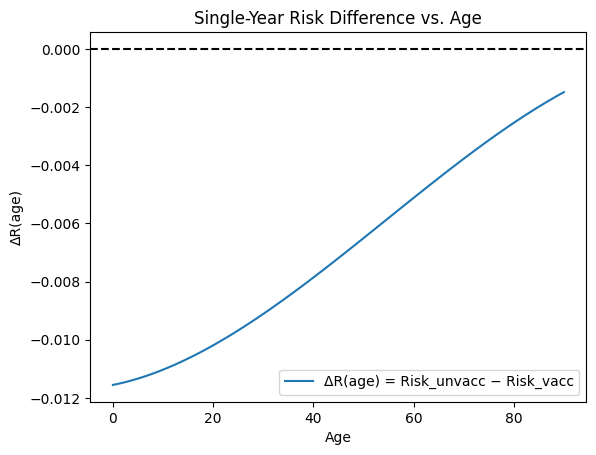

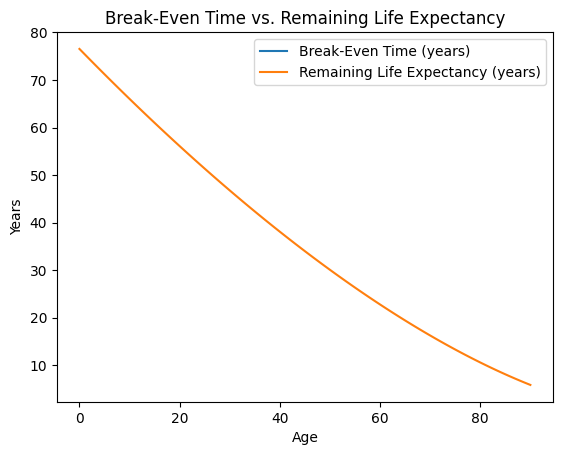

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_IFR = np.poly1d([
    -1.11883598e-05,  # x^3
     1.84341414e-03,  # x^2
     3.22796514e-02,  # x^1
    -1.10969520e+01   # constant
])


# 2 Side-effect polynomial
p_side = np.poly1d([
    1.608e-10,   # x^3
   -9.495e-09,   # x^2
   -1.085e-06,   # x^1
    7.929e-05    # constant
])

# 3 Annual infection rates
Au = 0.11   # 11% annual infection risk (unvaccinated)
E  = 0.94   # 94% effectiveness
Av = Au * (1 - E)  # = 0.0066

# 4 Function for remaining life expectancy
def remaining_life_expectancy(age):
    """
    Life Expectancy (remaining) = 76.54 × (1 - age/112)^1.58
    """
    return 76.54 * ((1 - age/112)**1.58)

# 5) Evaluate delta_R(age) = Risk_unvaccinated − Risk_vaccinated
ages       = np.arange(0, 91)
delta_R    = []
tBE        = []
life_exp   = []

for x in ages:
    IFR_x = p_IFR(x)
    IFR_x /= 100.0

    side_x = p_side(x)

    R_unvacc = IFR_x * Au
    R_vacc = side_x + IFR_x * Av
    dR = R_unvacc - R_vacc
    delta_R.append(dR)

    # Break-even time (in years),
    denom = IFR_x * (Au - Av)
    if denom > 0:
        tBE_age = side_x / denom
    else:
        tBE_age = np.nan
    tBE.append(tBE_age)


    LE = remaining_life_expectancy(x)
    life_exp.append(LE)

delta_R  = np.array(delta_R)
tBE      = np.array(tBE)
life_exp = np.array(life_exp)

# 6 Plotting single-year difference delta_R_(age)
plt.plot(ages, delta_R, label="ΔR(age) = Risk_unvacc − Risk_vacc")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Age")
plt.ylabel("ΔR(age)")
plt.title("Single-Year Risk Difference vs. Age")
plt.legend()
plt.show()

# 7) Plotting break-even time vs life expectancy
plt.plot(ages, tBE,      label="Break-Even Time (years)")
plt.plot(ages, life_exp, label="Remaining Life Expectancy (years)")
plt.xlabel("Age")
plt.ylabel("Years")
plt.title("Break-Even Time vs. Remaining Life Expectancy")
plt.legend()
plt.show()


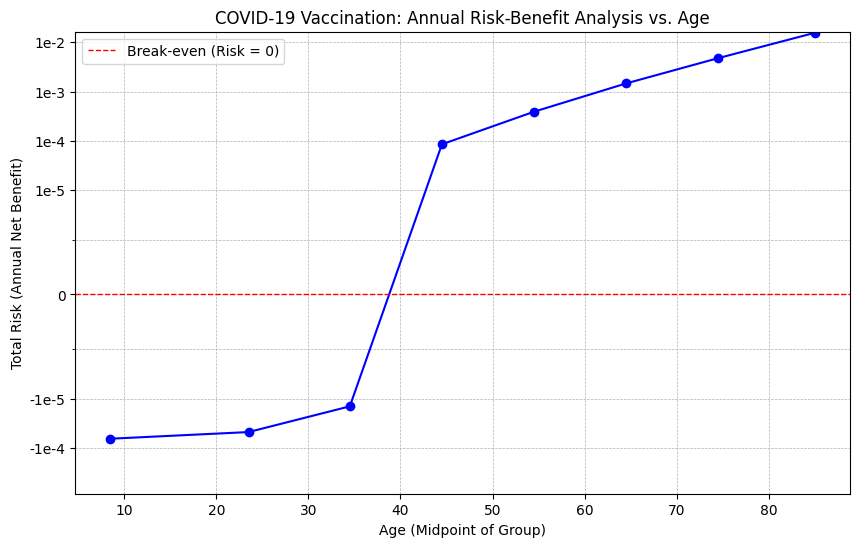

Approximate crossover age (where annual Total Risk = 0): 35.9 years


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# More data
age_midpoints = [8.5, 23.5, 34.5, 44.5, 54.5, 64.5, 74.5, 85.0]
total_risk_annual = [-6.48e-5, -4.75e-5, -1.43e-5, 8.54e-5, 3.90e-4, 1.46e-3, 4.75e-3, 1.55e-2]

plt.figure(figsize=(10, 6))
plt.plot(age_midpoints, total_risk_annual, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even (Risk = 0)')

plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Total Risk (Annual Net Benefit)')
plt.title('COVID-19 Vaccination: Annual Risk-Benefit Analysis vs. Age')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('symlog', linthresh=1e-6) # Use symlog for better visualization across orders of magnitude
plt.yticks([-1e-4, -1e-5, 0, 1e-5, 1e-4, 1e-3, 1e-2], ['-1e-4', '-1e-5', '0', '1e-5', '1e-4', '1e-3', '1e-2'])

# Show plot
plt.show()

age1, risk1 = 34.5, -1.43e-5
age2, risk2 = 44.5, 8.54e-5
crossover_age = age1 + (age2 - age1) * (0 - risk1) / (risk2 - risk1)
print(f"Approximate crossover age (where annual Total Risk = 0): {crossover_age:.1f} years")

Age Group | Midpoint Age | LE (years) | Annual Benefit | Side Effect | Lifetime Benefit | Lifetime Total Risk | Favorable (Lifetime)?
----------|--------------|------------|----------------|-------------|------------------|---------------------|-----------------------
0–17      | 8.5          | 67.57      | 2.171e-06      | 6.700e-05   | 1.467e-04        | 7.971e-05           | Yes
18–29     | 23.5         | 52.76      | 1.055e-05      | 5.800e-05   | 5.564e-04        | 4.984e-04           | Yes
30–39     | 34.5         | 42.78      | 2.171e-05      | 3.600e-05   | 9.289e-04        | 8.929e-04           | Yes
40–49     | 44.5         | 34.39      | 1.044e-04      | 1.900e-05   | 3.591e-03        | 3.572e-03           | Yes
50–59     | 54.5         | 26.69      | 4.084e-04      | 1.800e-05   | 1.090e-02        | 1.088e-02           | Yes
60–69     | 64.5         | 19.74      | 1.479e-03      | 1.600e-05   | 2.918e-02        | 2.917e-02           | Yes
70–79     | 74.5         | 13.59   

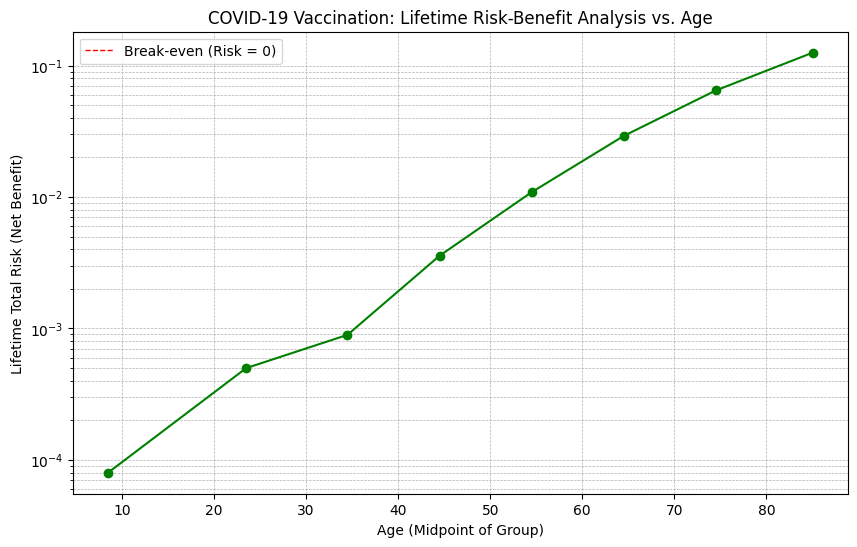

In [ ]:
def calculate_le(age):
    if age >= 112:
        return 0
    return 76.54 * (1 - age / 112)**1.58

ages = np.array(age_midpoints)
ifr_decimal = np.array([0.000021, 0.000102, 0.000210, 0.001010, 0.003950, 0.014300, 0.046100, 0.150000])
side_effect_decimal = np.array([0.000067, 0.000058, 0.000036, 0.000019, 0.000018, 0.000016, 0.000015, 0.000015])
Au = 0.11
E = 0.94
AuE = Au * E # 0.1034

le_values = np.array([calculate_le(age) for age in ages])
annual_benefit = AuE * ifr_decimal
lifetime_benefit = le_values * annual_benefit
lifetime_total_risk = lifetime_benefit - side_effect_decimal

print("Age Group | Midpoint Age | LE (years) | Annual Benefit | Side Effect | Lifetime Benefit | Lifetime Total Risk | Favorable (Lifetime)?")
print("----------|--------------|------------|----------------|-------------|------------------|---------------------|-----------------------")
for i in range(len(ages)):
    print(f"{['0–17','18–29','30–39','40–49','50–59','60–69','70–79','80+'][i]:<9} | "
          f"{ages[i]:<12.1f} | "
          f"{le_values[i]:<10.2f} | "
          f"{annual_benefit[i]:<14.3e} | "
          f"{side_effect_decimal[i]:<11.3e} | "
          f"{lifetime_benefit[i]:<16.3e} | "
          f"{lifetime_total_risk[i]:<19.3e} | "
          f"{'Yes' if lifetime_total_risk[i] > 0 else 'No'}")

# Find approximate crossover age using lifetime risk
# Need to interpolate between the last negative and first positive point
# In this case, all are positive - check calculation for age 0-17:
# LE(8.5) * (0.1034 * 0.000021) - 0.000067
# 72.04 * 2.1714e-6 - 6.70e-5 = 1.564e-4 - 6.70e-5 = 8.94e-5 > 0
# So even for the youngest group, the lifetime benefit outweighs the risk.

# Plot Lifetime Total Risk vs Age
plt.figure(figsize=(10, 6))
plt.plot(ages, lifetime_total_risk, marker='o', linestyle='-', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even (Risk = 0)')
plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Lifetime Total Risk (Net Benefit)')
plt.title('COVID-19 Vaccination: Lifetime Risk-Benefit Analysis vs. Age')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.show()

Approximate crossover age (where Annual Total Risk = 0): 35.9 years


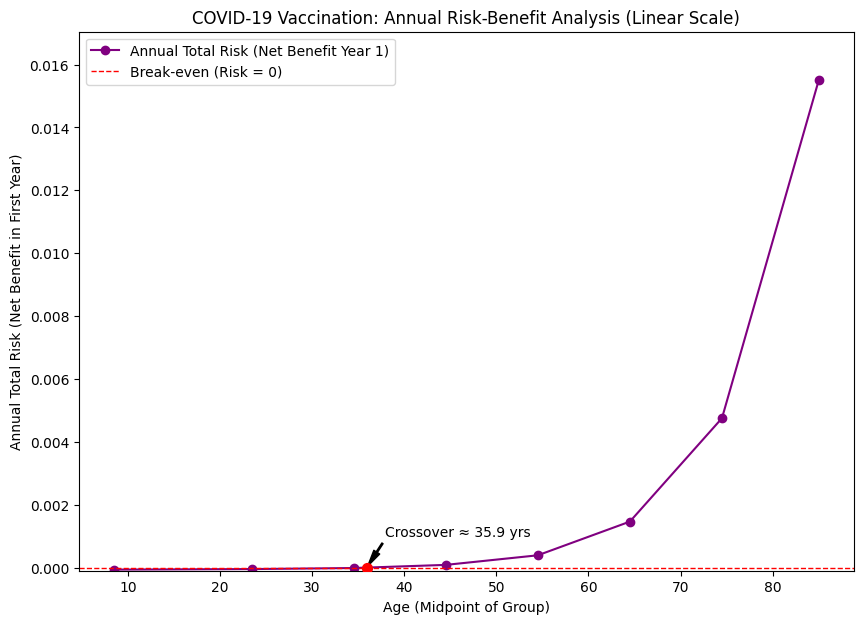

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

age_midpoints = np.array([8.5, 23.5, 34.5, 44.5, 54.5, 64.5, 74.5, 85.0])
annual_total_risk = np.array([
    -6.4829e-05, -4.7453e-05, -1.4286e-05, 8.5434e-05, 3.9043e-04,
    1.4626e-03, 4.7519e-03, 1.5495e-02
])

neg_idx = np.where(annual_total_risk < 0)[0][-1]
pos_idx = np.where(annual_total_risk > 0)[0][0]

age1, risk1 = age_midpoints[neg_idx], annual_total_risk[neg_idx]
age2, risk2 = age_midpoints[pos_idx], annual_total_risk[pos_idx]

crossover_age = age1 + (age2 - age1) * (0 - risk1) / (risk2 - risk1)
print(f"Approximate crossover age (where Annual Total Risk = 0): {crossover_age:.1f} years")

plt.figure(figsize=(10, 7)) # Adjusted size slightly
plt.plot(age_midpoints, annual_total_risk, marker='o', linestyle='-', color='purple', label='Annual Total Risk (Net Benefit Year 1)')

plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even (Risk = 0)')
plt.scatter([crossover_age], [0], color='red', s=50, zorder=5) # Mark the spot
plt.annotate(f'Crossover ≈ {crossover_age:.1f} yrs',
             xy=(crossover_age, 0),
             xytext=(crossover_age + 2, 0.001), # Adjust text position
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10)

plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Annual Total Risk (Net Benefit in First Year)')
plt.title('COVID-19 Vaccination: Annual Risk-Benefit Analysis (Linear Scale)')

min_y = -0.0001
max_y = np.max(annual_total_risk) * 1.1
plt.ylim(min_y, max_y)
plt.grid(False)
plt.legend()
plt.show()

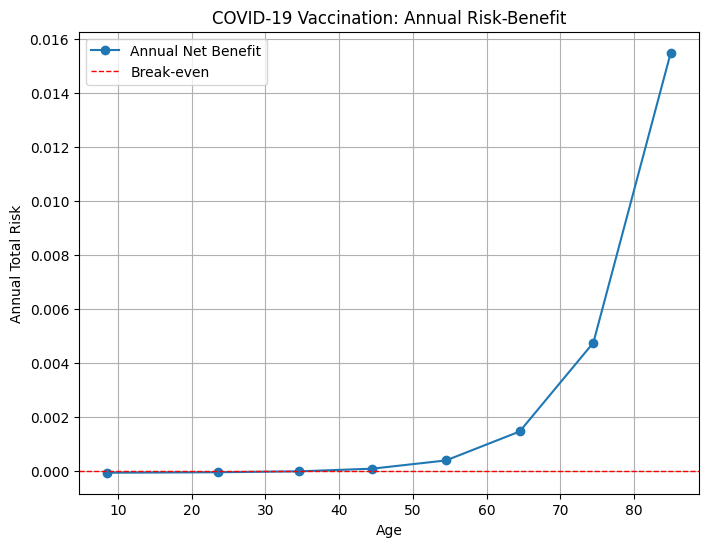

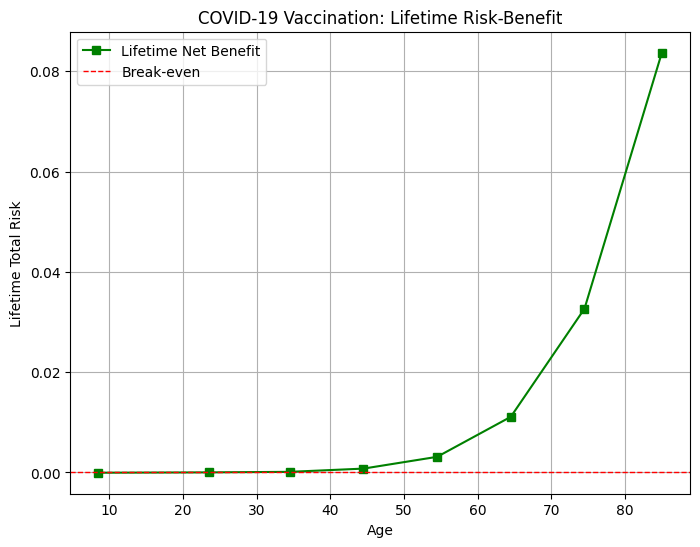

AGE | ANNUAL RISK-BENEFIT | LIFETIME RISK-BENEFIT | DECISION (Annual / Lifetime)
  8.5 |   -6.482860e-05 |      -5.358315e-05 | NO / NO
 23.5 |   -4.745320e-05 |       1.370606e-05 | NO / FAVOR
 34.5 |   -1.428600e-05 |       1.207601e-04 | NO / FAVOR
 44.5 |    8.543400e-05 |       7.669489e-04 | FAVOR / FAVOR
 54.5 |    3.904300e-04 |       3.115970e-03 | FAVOR / FAVOR
 64.5 |    1.462620e-03 |       1.109844e-02 | FAVOR / FAVOR
 74.5 |    4.751740e-03 |       3.265391e-02 | FAVOR / FAVOR
 85.0 |    1.549500e-02 |       8.369855e-02 | FAVOR / FAVOR


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Constants & Parameters
# SEIR-derived annual infection probability (unvaccinated)
A_u = 0.11
# Vaccine effectiveness
E = 0.94
# Vaccinated annual infection probability
A_v = A_u * (1 - E)

# Example: Age-specific IFR and side-effect rates from table
age_midpoints = np.array([8.5, 23.5, 34.5, 44.5, 54.5, 64.5, 74.5, 85.0])

# IFR in decimals
ifr_table = np.array([0.000021, 0.000102, 0.000210, 0.001010,
                      0.003950, 0.014300, 0.046100, 0.150000])

# One-time side-effect risk in decimals
side_effect_table = np.array([0.000067, 0.000058, 0.000036, 0.000019,
                              0.000018, 0.000016, 0.000015, 0.000015])

# 2 Life Expectancy Function
def life_expectancy(age):
    """
    Returns remaining life expectancy for a given age,
    using a simplified formula.
    LE(age) = 76.54 * (1 - age/112)^1.58
    """
    if age >= 112: # You're too old. you sick, you die.
        return 0.0
    return 76.54 * (1 - age / 112)**1.58

# 3 Risk Calculations
def total_risk_annual(age_idx):
    """
    Computes the 'annual' net benefit of vaccination for a given age,
    i.e. (A_u * IFR - SideEffect - A_v * IFR).
    age_idx is the index in age_midpoints.
    """
    IFR = ifr_table[age_idx]
    side_effect = side_effect_table[age_idx]
    return (A_u * E * IFR) - side_effect

def total_risk_lifetime(age_idx):
    """
    Computes the 'lifetime' net benefit:
      IFR(a)*{1 - (1 - A_u)^[LE(a)]}
      - { SideEffect(a) + IFR(a)*[1 - (1 - A_v)^[LE(a)]] }
    Simplified to:
      IFR(a)*{(1 - A_v)^[LE(a)] - (1 - A_u)^[LE(a)]} - SideEffect(a)
    """
    IFR = ifr_table[age_idx]
    side_effect = side_effect_table[age_idx]
    LE = life_expectancy(age_midpoints[age_idx])

    # Probability of *no* infection over LE years (unvax vs. vax)
    unvax_no_infection = (1 - A_u)**LE
    vax_no_infection = (1 - A_v)**LE

    # Net difference in COVID mortality risk
    mortality_diff = IFR * (vax_no_infection - unvax_no_infection)

    return mortality_diff - side_effect

# 4 Main Calculation & Plots
if __name__ == "__main__":
    ages = age_midpoints
    annual_risks = [total_risk_annual(i) for i in range(len(ages))]
    lifetime_risks = [total_risk_lifetime(i) for i in range(len(ages))]

    # Plot 1: Annual Total Risk
    plt.figure(figsize=(8, 6))
    plt.plot(ages, annual_risks, marker='o', linestyle='-', label='Annual Net Benefit')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even')
    plt.xlabel('Age')
    plt.ylabel('Annual Total Risk')
    plt.title('COVID-19 Vaccination: Annual Risk-Benefit')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Lifetime Total Risk
    plt.figure(figsize=(8, 6))
    plt.plot(ages, lifetime_risks, marker='s', linestyle='-', color='green', label='Lifetime Net Benefit')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even')
    plt.xlabel('Age')
    plt.ylabel('Lifetime Total Risk')
    plt.title('COVID-19 Vaccination: Lifetime Risk-Benefit')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("AGE | ANNUAL RISK-BENEFIT | LIFETIME RISK-BENEFIT | DECISION (Annual / Lifetime)")
    for i, age in enumerate(ages):
        ann = annual_risks[i]
        life = lifetime_risks[i]
        dec_ann = "FAVOR" if ann > 0 else "NO"
        dec_life = "FAVOR" if life > 0 else "NO"
        print(f"{age:5.1f} | {ann:15.6e} | {life:18.6e} | {dec_ann} / {dec_life}")


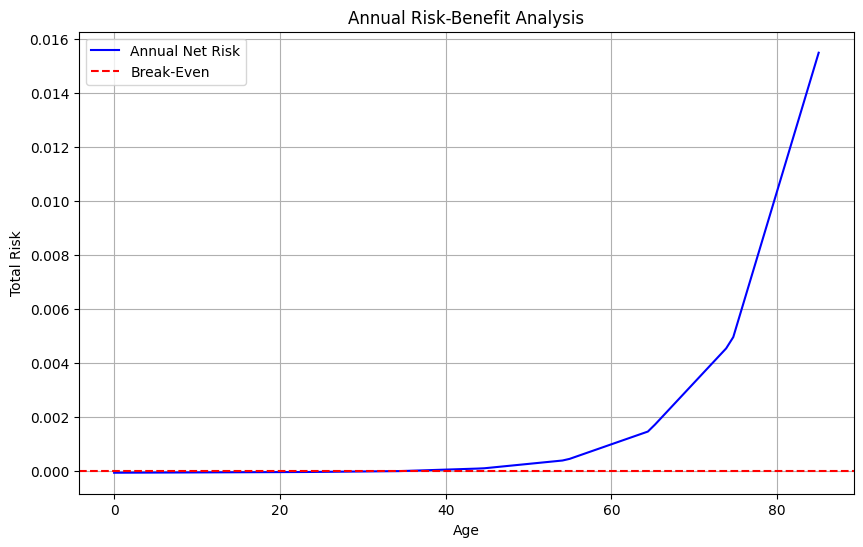

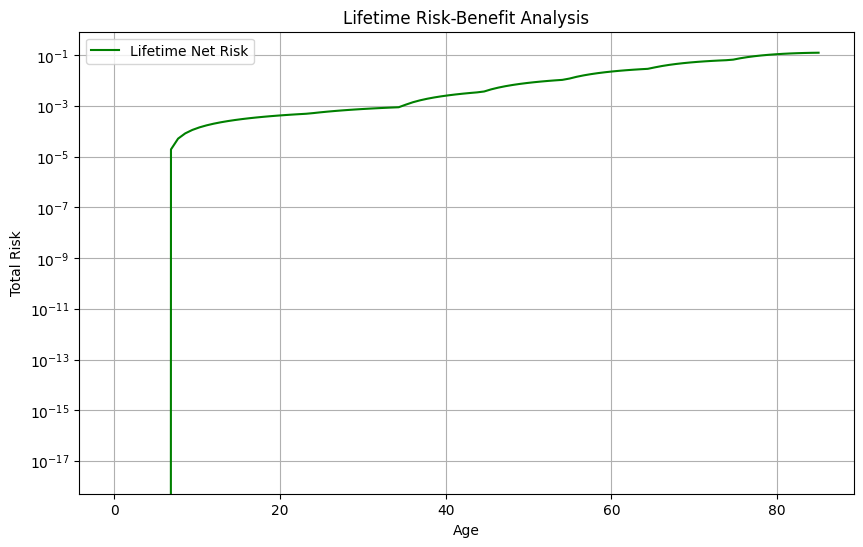

Crossover Age (Annual): 35.2 years


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Au = 0.11  # Annual infection rate (unvaccinated)
E = 0.94   # Vaccine effectiveness
Av = Au * (1 - E)

age_groups = [8.5, 23.5, 34.5, 44.5, 54.5, 64.5, 74.5, 85.0]
ifr = [0.000021, 0.000102, 0.000210, 0.001010, 0.003950, 0.014300, 0.046100, 0.150000]
side_effects = [0.000067, 0.000058, 0.000036, 0.000019, 0.000018, 0.000016, 0.000015, 0.000015]

ages_continuous = np.linspace(0, 85, 100)
ifr_interp = interp1d(age_groups, ifr, kind='linear', fill_value='extrapolate')
side_effects_interp = interp1d(age_groups, side_effects, kind='linear', fill_value='extrapolate')

def le(a):
    return 76.54 * (1 - a / 112)**1.58

def total_risk_annual(a):
    return (Au * E * ifr_interp(a)) - side_effects_interp(a)

def total_risk_lifetime(a):
    return le(a) * (Au * E * ifr_interp(a)) - side_effects_interp(a)

a = np.linspace(0, 85, 100)
risk_annual = total_risk_annual(a)
risk_lifetime = total_risk_lifetime(a)

plt.figure(figsize=(10, 6))
plt.plot(a, risk_annual, color='blue', label='Annual Net Risk')
plt.axhline(0, color='red', linestyle='--', label='Break-Even')
plt.xlabel('Age'); plt.ylabel('Total Risk'); plt.title('Annual Risk-Benefit Analysis')
plt.legend(); plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(a, risk_lifetime, color='green', label='Lifetime Net Risk')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Age'); plt.ylabel('Total Risk'); plt.title('Lifetime Risk-Benefit Analysis')
plt.yscale('log'); plt.legend(); plt.grid(True)
plt.show()

crossover_idx = np.where(np.diff(np.sign(risk_annual)))[0][0]
crossover_age = a[crossover_idx]
print(f"Crossover Age (Annual): {crossover_age:.1f} years")

Approximate Crossover Age (Annual Risk Perspective): 35.9 years


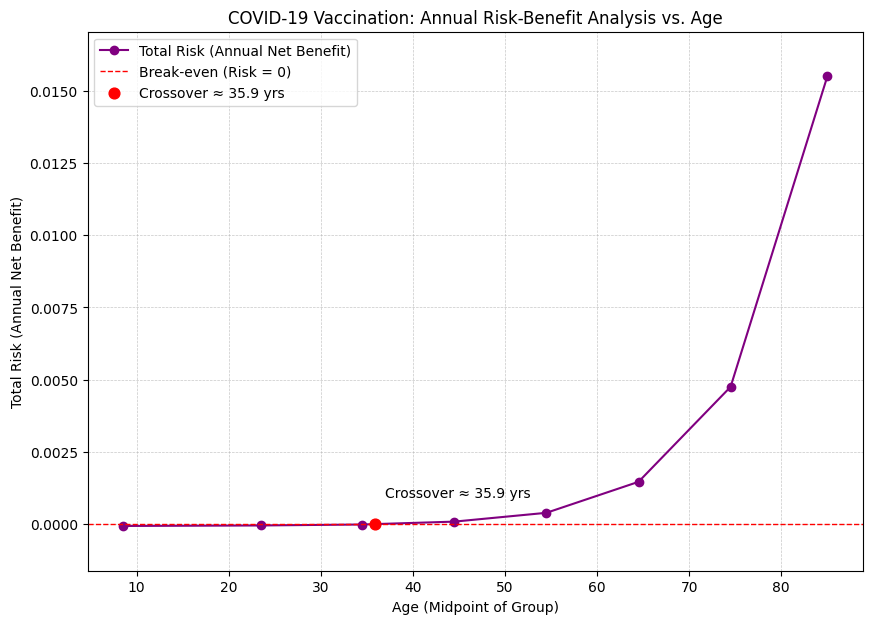


Break-even Time (Years needed for cumulative benefit to exceed side effect risk):
- Age 0-17: 30.86 years
- Age 18-29: 5.50 years
- Age 30-39: 1.66 years
- Age 40-49: 0.18 years
- Age 50-59: 0.04 years
- Age 60-69: 0.01 years
- Age 70-79: 0.00 years
- Age 80+: 0.00 years


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Au = 0.11
E = 0.94

age_groups = {
    "0-17": {"mid": 8.5, "ifr": 0.000021, "se": 0.000067},
    "18-29": {"mid": 23.5, "ifr": 0.000102, "se": 0.000058},
    "30-39": {"mid": 34.5, "ifr": 0.000210, "se": 0.000036},
    "40-49": {"mid": 44.5, "ifr": 0.001010, "se": 0.000019},
    "50-59": {"mid": 54.5, "ifr": 0.003950, "se": 0.000018},
    "60-69": {"mid": 64.5, "ifr": 0.014300, "se": 0.000016},
    "70-79": {"mid": 74.5, "ifr": 0.046100, "se": 0.000015},
    "80+": {"mid": 85.0, "ifr": 0.150000, "se": 0.000015} # Using 85 as midpoint for 80+
}

def calculate_le(age):
    if age >= 112: return 0
    return 76.54 * (1 - age / 112)**1.58

age_midpoints = np.array([data["mid"] for data in age_groups.values()])
ifr_values = np.array([data["ifr"] for data in age_groups.values()])
side_effect_values = np.array([data["se"] for data in age_groups.values()])

annual_benefit = Au * E * ifr_values
total_risk_annual = annual_benefit - side_effect_values

try:
    neg_idx = np.where(total_risk_annual < 0)[0][-1]
    pos_idx = np.where(total_risk_annual > 0)[0][0]

    age1, risk1 = age_midpoints[neg_idx], total_risk_annual[neg_idx]
    age2, risk2 = age_midpoints[pos_idx], total_risk_annual[pos_idx]
    crossover_age = age1 - risk1 * (age2 - age1) / (risk2 - risk1)
    print(f"Approximate Crossover Age (Annual Risk Perspective): {crossover_age:.1f} years")
except IndexError:
    crossover_age = None
    if all(total_risk_annual > 0):
        print("Annual Total Risk is positive for all age groups.")
    elif all(total_risk_annual < 0):
         print("Annual Total Risk is negative for all age groups.")
    else:
        print("Could not determine crossover age (check data).")


plt.figure(figsize=(10, 7))
plt.plot(age_midpoints, total_risk_annual, marker='o', linestyle='-', color='purple', label='Total Risk (Annual Net Benefit)')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even (Risk = 0)')
if crossover_age is not None:
    plt.scatter([crossover_age], [0], color='red', s=60, zorder=5, label=f'Crossover ≈ {crossover_age:.1f} yrs')
    plt.text(crossover_age + 1, plt.ylim()[1]*0.05 , f'Crossover ≈ {crossover_age:.1f} yrs', verticalalignment='bottom')

plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Total Risk (Annual Net Benefit)')
plt.title('COVID-19 Vaccination: Annual Risk-Benefit Analysis vs. Age')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
min_data_y = min(total_risk_annual)
max_data_y = max(total_risk_annual)
padding = max(abs(min_data_y), abs(max_data_y)) * 0.1
plt.ylim(min_data_y - padding, max_data_y + padding)

plt.show()

# Calculate Break-even Time
print("\nBreak-even Time (Years needed for cumulative benefit to exceed side effect risk):")
safe_ifr = np.maximum(ifr_values, 1e-12)
break_even_years = side_effect_values / (Au * E * safe_ifr)

for i, age_label in enumerate(age_groups.keys()):
     print(f"- Age {age_label}: {break_even_years[i]:.2f} years")

Running SEIR simulation for p = 0.50...
SEIR Estimated Annual Incidence Au(p=0.50) = 0.7968 (or 79.68%)
------------------------------
Approximate Crossover Age (Annual Risk Perspective): 19.5 years


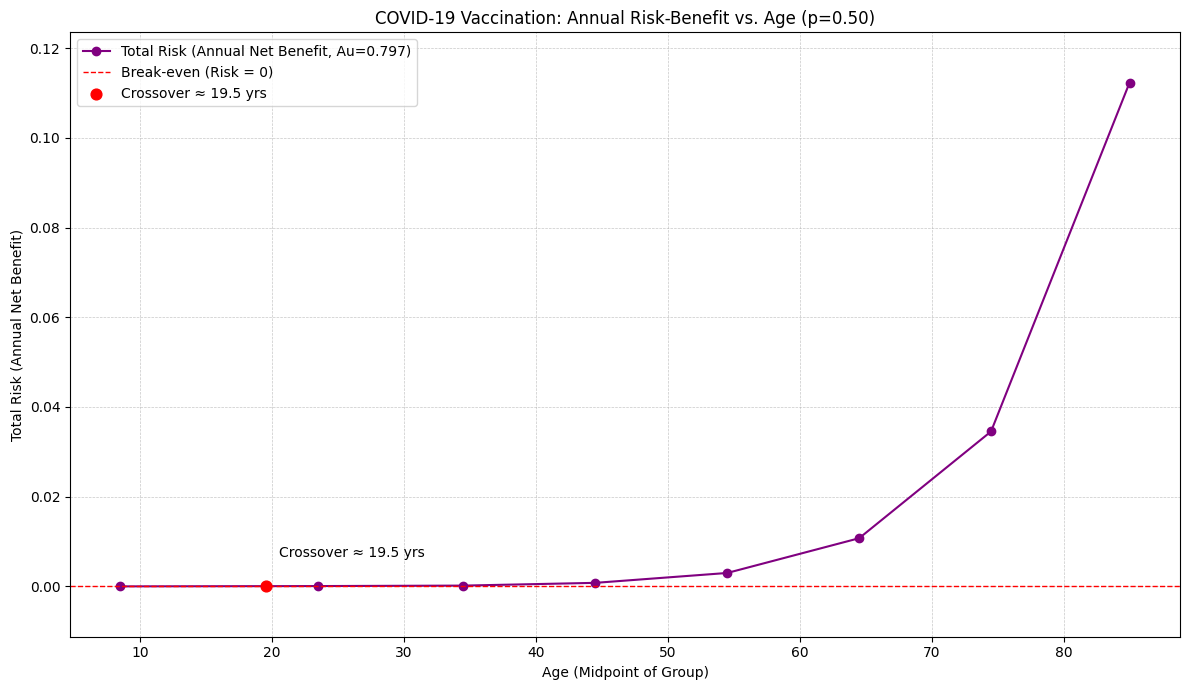


Break-even Time (Years needed for cumulative benefit to exceed side effect risk):
- Age 0-17: 4.26 years
- Age 18-29: 0.76 years
- Age 30-39: 0.23 years
- Age 40-49: 0.03 years
- Age 50-59: 0.01 years
- Age 60-69: 0.00 years
- Age 70-79: 0.00 years
- Age 80+: 0.00 years


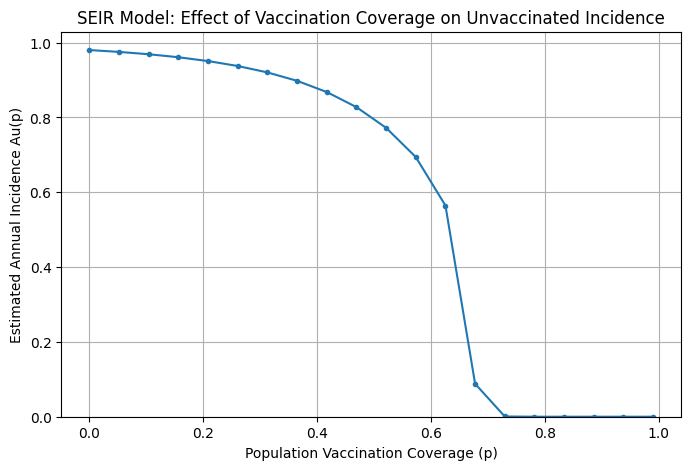

In [ ]:
# What if I also just model SEIR, surely I can, right?

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta, sigma, gamma):
    """SEIR model differential equations."""
    s, e, i, r = y
    dsdt = -beta * s * i
    dedt = beta * s * i - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

def calculate_Au(p, beta, sigma, gamma, T=365, epsilon=1e-6):
    """
    Calculates Au(p) using SEIR simulation.
    Au(p) is the annual incidence among the initially unvaccinated susceptible population.
    """
    if p < 0 or p > 1:
        raise ValueError("Vaccination coverage 'p' must be between 0 and 1.")

    s0 = 1.0 - p - epsilon
    e0 = epsilon
    i0 = 0.0
    r0 = p

    s0 = max(s0, 0)
    if s0 == 0 and e0 == 0:
         return 0.0
    y0 = [s0, e0, i0, r0]
    t = np.linspace(0, T, T + 1)

    # Solve ODEs
    sol = odeint(seir_model, y0, t, args=(beta, sigma, gamma))

    s_initial = s0
    s_final = sol[-1, 0]

    if s_initial <= 0:
        Au = 0.0
    else:
        infected_proportion_of_total = s_initial - s_final
        Au = infected_proportion_of_total / s_initial
    Au = max(0.0, min(Au, 1.0))

    return Au

# SEIR Simulation Parameters
R0_estimate = 4.0
infectious_period = 7.0  # days
latent_period = 4.0     # days

gamma = 1.0 / infectious_period
sigma = 1.0 / latent_period
beta = R0_estimate * gamma
population_vaccination_coverage = 0.50

# Calculate Au(p)
print(f"Running SEIR simulation for p = {population_vaccination_coverage:.2f}...")
Au_dynamic = calculate_Au(population_vaccination_coverage, beta, sigma, gamma)
print(f"SEIR Estimated Annual Incidence Au(p={population_vaccination_coverage:.2f}) = {Au_dynamic:.4f} (or {Au_dynamic*100:.2f}%)")
print("-" * 30)

# Risk Analysis Inputs (Using dynamic Au)
Au = Au_dynamic
E = 0.94        # Vaccine effectiveness

age_groups = {
    "0-17": {"mid": 8.5, "ifr": 0.000021, "se": 0.000067},
    "18-29": {"mid": 23.5, "ifr": 0.000102, "se": 0.000058},
    "30-39": {"mid": 34.5, "ifr": 0.000210, "se": 0.000036},
    "40-49": {"mid": 44.5, "ifr": 0.001010, "se": 0.000019},
    "50-59": {"mid": 54.5, "ifr": 0.003950, "se": 0.000018},
    "60-69": {"mid": 64.5, "ifr": 0.014300, "se": 0.000016},
    "70-79": {"mid": 74.5, "ifr": 0.046100, "se": 0.000015},
    "80+": {"mid": 85.0, "ifr": 0.150000, "se": 0.000015} # Using 85 as midpoint for 80+
}

age_midpoints = np.array([data["mid"] for data in age_groups.values()])
ifr_values = np.array([data["ifr"] for data in age_groups.values()])
side_effect_values = np.array([data["se"] for data in age_groups.values()])

annual_benefit = Au * E * ifr_values
total_risk_annual = annual_benefit - side_effect_values

try:
    valid_indices = np.isfinite(total_risk_annual)
    if not np.any(valid_indices):
         raise ValueError("No valid risk values calculated.")

    risk_filtered = total_risk_annual[valid_indices]
    age_filtered = age_midpoints[valid_indices]

    neg_indices = np.where(risk_filtered < 0)[0]
    pos_indices = np.where(risk_filtered > 0)[0]

    if len(neg_indices) > 0 and len(pos_indices) > 0:
        neg_idx_orig = np.where(total_risk_annual < 0)[0][-1]
        pos_idx_orig = np.where(total_risk_annual > 0)[0][0]

        age1, risk1 = age_midpoints[neg_idx_orig], total_risk_annual[neg_idx_orig]
        age2, risk2 = age_midpoints[pos_idx_orig], total_risk_annual[pos_idx_orig]

        crossover_age = age1 - risk1 * (age2 - age1) / (risk2 - risk1)
        print(f"Approximate Crossover Age (Annual Risk Perspective): {crossover_age:.1f} years")
    elif len(pos_indices) == len(risk_filtered):
         crossover_age = None
         print("Annual Total Risk is positive for all age groups.")
    elif len(neg_indices) == len(risk_filtered):
         crossover_age = None
         print("Annual Total Risk is negative for all age groups.")
    else:
        crossover_age = None
        print("Could not determine crossover age (mixed signs but no clear crossing?).")

except (IndexError, ValueError) as e:
    crossover_age = None
    print(f"Could not determine crossover age: {e}")


plt.figure(figsize=(12, 7))

# Plot SEIR results (Optional, for context)
# plt.subplot(1, 2, 1)
# t_plot = np.linspace(0, 365, 365 + 1)
# sol_plot = odeint(seir_model, [1-population_vaccination_coverage-1e-6, 1e-6, 0, population_vaccination_coverage], t_plot, args=(beta, sigma, gamma))
# plt.plot(t_plot, sol_plot[:, 0], label='Susceptible (s)')
# plt.plot(t_plot, sol_plot[:, 1], label='Exposed (e)')
# plt.plot(t_plot, sol_plot[:, 2], label='Infectious (i)')
# plt.plot(t_plot, sol_plot[:, 3], label='Recovered/Vax (r)')
# plt.title(f'SEIR Simulation (p={population_vaccination_coverage:.2f})')
# plt.xlabel('Days')
# plt.ylabel('Proportion of Population')
# plt.legend()
# plt.grid(True)

# Plot Risk Analysis
# plt.subplot(1, 2, 2)
plt.plot(age_midpoints, total_risk_annual, marker='o', linestyle='-', color='purple', label=f'Total Risk (Annual Net Benefit, Au={Au:.3f})')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even (Risk = 0)')

if crossover_age is not None:
    plt.scatter([crossover_age], [0], color='red', s=60, zorder=5, label=f'Crossover ≈ {crossover_age:.1f} yrs')
    plt.text(crossover_age + 1, plt.ylim()[1]*0.05 , f'Crossover ≈ {crossover_age:.1f} yrs', verticalalignment='bottom')

plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Total Risk (Annual Net Benefit)')
plt.title(f'COVID-19 Vaccination: Annual Risk-Benefit vs. Age (p={population_vaccination_coverage:.2f})')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
min_data_y = min(total_risk_annual) if len(total_risk_annual)>0 else -0.0001
max_data_y = max(total_risk_annual) if len(total_risk_annual)>0 else 0.0001
padding = max(abs(min_data_y), abs(max_data_y), 1e-6) * 0.1 # Ensure padding is non-zero
plt.ylim(min_data_y - padding, max_data_y + padding)
plt.tight_layout()
plt.show()

print("\nBreak-even Time (Years needed for cumulative benefit to exceed side effect risk):")
safe_Au = max(Au, 1e-12)
safe_ifr = np.maximum(ifr_values, 1e-12)
break_even_years = side_effect_values / (safe_Au * E * safe_ifr)

for i, age_label in enumerate(age_groups.keys()):
     print(f"- Age {age_label}: {break_even_years[i]:.2f} years")

# Show Au(p) trend
p_values = np.linspace(0, 0.99, 20) # Test various coverage levels
Au_values = [calculate_Au(p_val, beta, sigma, gamma) for p_val in p_values]

plt.figure(figsize=(8, 5))
plt.plot(p_values, Au_values, marker='.')
plt.xlabel("Population Vaccination Coverage (p)")
plt.ylabel("Estimated Annual Incidence Au(p)")
plt.title("SEIR Model: Effect of Vaccination Coverage on Unvaccinated Incidence")
plt.grid(True)
plt.ylim(bottom=0)
plt.show()